In [23]:
# Load the required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [25]:
# Load the data
data = pd.read_csv('.\RS AUG 24 Data FINAL.csv')

In [27]:
# Display the first few rows of the data
data.head(5)

,ParticipantID,Sex,Age,SES,Smoking,Alcohol,Physical,Glucose
0,1,0,4,0,1,9,1,4.8
1,2,1,4,1,1,5,1,3.8
2,3,1,3,0,1,4,1,3.8
3,4,0,4,1,0,0,0,5.8
4,5,1,2,0,1,9,1,5.8


In [29]:
# Remove unnecessary column
data = data.drop('ParticipantID', axis=1)

In [35]:
# View the summary of the data
data.describe()


,Sex,Age,SES,Smoking,Alcohol,Physical,Glucose
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.520000,2.012500,0.997500,0.506250,7.507500,0.500000,6.179000
std,0.499912,1.415043,0.809823,0.500274,4.637545,0.500313,2.204702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,4.400000
50%,1.000000,2.000000,1.000000,1.000000,8.000000,0.500000,5.900000
75%,1.000000,3.000000,2.000000,1.000000,11.000000,1.000000,6.900000
max,1.000000,4.000000,2.000000,1.000000,15.000000,1.000000,12.000000


In [33]:

# Get summary statistics
summary = data.describe()

# Save the summary as a JSON file
summary.to_json('summary.json', orient='index', indent=4)

In [13]:
# Convert categorical variables to appropriate types
data['Sex'] = data['Sex'].astype('category')
data['SES'] = data['SES'].astype('category')
data['Smoking'] = data['Smoking'].astype('category')
data['Alcohol'] = data['Alcohol'].astype('category')
data['Physical'] = data['Physical'].astype('category')

In [15]:
# One-Way ANOVA

#Sex
model_sex = ols('Glucose ~ Sex', data=data).fit()
anova_table_sex = sm.stats.anova_lm(model_sex, typ=2)
print('One-Way ANOVA for Sex:\n', anova_table_sex)

# SES
model_ses = ols('Glucose ~ SES', data=data).fit()
anova_table_ses = sm.stats.anova_lm(model_ses, typ=2)
print('One-Way ANOVA for SES:\n', anova_table_ses)

### Smoking
model_smoking = ols('Glucose ~ Smoking', data=data).fit()
anova_table_smoking = sm.stats.anova_lm(model_smoking, typ=2)
print('One-Way ANOVA for Smoking:\n', anova_table_smoking)

### Alcohol
model_alcohol = ols('Glucose ~ Alcohol', data=data).fit()
anova_table_alcohol = sm.stats.anova_lm(model_alcohol, typ=2)
print('\nOne-Way ANOVA for Alcohol:\n', anova_table_alcohol)

### Physical Activity
model_physical = ols('Glucose ~ Physical', data=data).fit()
anova_table_physical = sm.stats.anova_lm(model_physical, typ=2)
print('\nOne-Way ANOVA for Physical Activity:\n', anova_table_physical)

One-Way ANOVA for Sex:
                sum_sq     df         F    PR(>F)
Sex          0.002026    1.0  0.000416  0.983728
Residual  3883.705174  798.0       NaN       NaN
One-Way ANOVA for SES:
                sum_sq     df         F    PR(>F)
SES         12.043788    2.0  1.239635  0.290047
Residual  3871.663412  797.0       NaN       NaN
One-Way ANOVA for Smoking:
                sum_sq     df         F    PR(>F)
Smoking      4.353405    1.0  0.895514  0.344274
Residual  3879.353795  798.0       NaN       NaN

One-Way ANOVA for Alcohol:
                sum_sq     df         F    PR(>F)
Alcohol     90.255505   15.0  1.243552  0.233058
Residual  3793.451695  784.0       NaN       NaN

One-Way ANOVA for Physical Activity:
              sum_sq     df         F    PR(>F)
Physical     0.1682    1.0  0.034562  0.852563
Residual  3883.5390  798.0       NaN       NaN


In [19]:
# Dictionary to hold all ANOVA results
oneway_anova_results = {}

# Function to clean NaN values before exporting (replacing NaN with the string "NaN")
def clean_na(value):
    if isinstance(value, float) and np.isnan(value):
        return "NaN"  # Replace NaN with the string "NaN"
    return value

# Sex
model_sex = ols('Glucose ~ C(Sex)', data=data).fit()
anova_table_sex = sm.stats.anova_lm(model_sex, typ=2)
oneway_anova_results['Sex'] = anova_table_sex.reset_index().to_dict(orient='records')


# SES
model_ses = ols('Glucose ~ C(SES)', data=data).fit()
anova_table_ses = sm.stats.anova_lm(model_ses, typ=2)
oneway_anova_results['SES'] = anova_table_ses.reset_index().to_dict(orient='records')


# Smoking
model_smoking = ols('Glucose ~ C(Smoking)', data=data).fit()
anova_table_smoking = sm.stats.anova_lm(model_smoking, typ=2)
oneway_anova_results['Smoking'] = anova_table_smoking.reset_index().to_dict(orient='records')


# Alcohol
model_alcohol = ols('Glucose ~ C(Alcohol)', data=data).fit()
anova_table_alcohol = sm.stats.anova_lm(model_alcohol, typ=2)
oneway_anova_results['Alcohol'] = anova_table_alcohol.reset_index().to_dict(orient='records')

# Physical Activity
model_physical = ols('Glucose ~ C(Physical)', data=data).fit()
anova_table_physical = sm.stats.anova_lm(model_physical, typ=2)
oneway_anova_results['Physical'] = anova_table_physical.reset_index().to_dict(orient='records')

# Clean the results to replace NaN with the string "NaN"
for category in oneway_anova_results:
    for row in oneway_anova_results[category]:
        for key in row:
            row[key] = clean_na(row[key])

# Export to JSON
with open("oneway_anova_results.json", "w") as f:
    json.dump(oneway_anova_results, f, indent=4)

print("ANOVA results saved to oneway_anova_results.json")

ANOVA results saved to oneway_anova_results.json


In [35]:
# Two-Way ANOVA
model_2way = ols('Glucose ~ Sex + SES + Smoking + Alcohol + Physical + Sex:SES + Sex:Smoking + Sex:Alcohol + Sex:Physical + SES:Smoking + SES:Alcohol + SES:Physical + Smoking:Alcohol + Smoking:Physical + Alcohol:Physical', data=data).fit()
anova_table_2way = sm.stats.anova_lm(model_2way, typ=2)
print('\nTwo-Way ANOVA:\n', anova_table_2way)

# Get the ANOVA table
anova_table_2way = sm.stats.anova_lm(model_2way, typ=2)

# Convert the ANOVA table to a list of dictionaries
anova_dict = anova_table_2way.reset_index().to_dict(orient='records')

# Replace NaN with None (so it becomes `null` in JSON)
for row in anova_dict:
    for key, value in row.items():
        if isinstance(value, float) and np.isnan(value):
            row[key] = None

# Save the dictionary to a JSON file
with open('twoway_anova_results.json', 'w') as f:
    json.dump(anova_dict, f, indent=4)

print("ANOVA results saved to twoway_anova_results.json")


Two-Way ANOVA:
                        sum_sq     df         F    PR(>F)
Sex                  0.015834    1.0  0.003247  0.954576
SES                 11.730162    2.0  1.202663  0.301018
Smoking              6.121653    1.0  1.255274  0.262935
Alcohol             90.437891   15.0  1.236315  0.238661
Physical             0.166506    1.0  0.034143  0.853457
Sex:SES              0.678567    2.0  0.069572  0.932800
Sex:Smoking          2.524847    1.0  0.517732  0.472053
Sex:Alcohol         63.097421   15.0  0.862562  0.607015
Sex:Physical         1.452587    1.0  0.297860  0.585402
SES:Smoking          6.577468    2.0  0.674371  0.509810
SES:Alcohol        162.474653   30.0  1.110540  0.314236
SES:Physical         2.776835    2.0  0.284702  0.752326
Smoking:Alcohol     76.125555   15.0  1.040661  0.410431
Smoking:Physical     1.075353    1.0  0.220506  0.638802
Alcohol:Physical    86.822859   15.0  1.186896  0.276420
Residual          3389.338427  695.0       NaN       NaN
ANOVA results 

In [17]:
import json
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Two-Way ANOVA 
model_2way = ols('Glucose ~ Sex + SES + Smoking + Alcohol + Physical + Sex:SES + Sex:Smoking + Sex:Alcohol + Sex:Physical + SES:Smoking + SES:Alcohol + SES:Physical + Smoking:Alcohol + Smoking:Physical + Alcohol:Physical', data=data).fit()
anova_table_2way = sm.stats.anova_lm(model_2way, typ=2)
print('\nTwo-Way ANOVA:\n', anova_table_2way)

# Convert the Two-Way ANOVA result to a dictionary and then to JSON format
anova_2way_result = anova_table_2way.reset_index().to_dict(orient='records')

# Function to clean NaN values before exporting (replace NaN with None for JSON)
def clean_na(value):
    if isinstance(value, float) and np.isnan(value):
        return None  # Replace NaN with None
    return value

# Clean the results to replace NaN with None (for JSON export)
for row in anova_2way_result:
    for key in row:
        row[key] = clean_na(row[key])

# Create a dictionary to hold the results for saving
anova_results = {
    "Two-Way": anova_2way_result
}

# Export to JSON file
with open("two_way_anova_results.json", "w") as f:
    json.dump(anova_results, f, indent=4)

print("Two-Way ANOVA results saved to two_way_anova_results.json")



Two-Way ANOVA:
                        sum_sq     df         F    PR(>F)
Sex                  0.015834    1.0  0.003247  0.954576
SES                 11.730162    2.0  1.202663  0.301018
Smoking              6.121653    1.0  1.255274  0.262935
Alcohol             90.437891   15.0  1.236315  0.238661
Physical             0.166506    1.0  0.034143  0.853457
Sex:SES              0.678567    2.0  0.069572  0.932800
Sex:Smoking          2.524847    1.0  0.517732  0.472053
Sex:Alcohol         63.097421   15.0  0.862562  0.607015
Sex:Physical         1.452587    1.0  0.297860  0.585402
SES:Smoking          6.577468    2.0  0.674371  0.509810
SES:Alcohol        162.474653   30.0  1.110540  0.314236
SES:Physical         2.776835    2.0  0.284702  0.752326
Smoking:Alcohol     76.125555   15.0  1.040661  0.410431
Smoking:Physical     1.075353    1.0  0.220506  0.638802
Alcohol:Physical    86.822859   15.0  1.186896  0.276420
Residual          3389.338427  695.0       NaN       NaN
Two-Way ANOVA 

In [21]:
# Three-Way ANOVA
model_3way = ols('Glucose ~ Sex + SES + Smoking + Alcohol + Physical + Sex:SES:Smoking + Sex:SES:Alcohol + Sex:SES:Physical + Sex:Smoking:Alcohol + Sex:Smoking:Physical + SES:Smoking:Alcohol + SES:Alcohol:Physical + Smoking:Alcohol:Physical', data=data).fit()
anova_table_3way = sm.stats.anova_lm(model_3way, typ=2)
print('\nThree-Way ANOVA:\n', anova_table_3way)

# anova_table_3way = sm.stats.anova_lm(model_3way, typ=2)

# Function to clean NaN values
def clean_nan(value):
    if isinstance(value, float) and np.isnan(value):
        return "NaN"
    return value

# Convert to dictionary and clean NaNs
anova_dict = anova_table_3way.reset_index().to_dict(orient='records')
for row in anova_dict:
    for key in row:
        row[key] = clean_nan(row[key])

# Save to JSON
with open("threeway_anova_results.json", "w") as f:
    json.dump(anova_dict, f, indent=4)

print("Three-Way ANOVA results saved to threeway_anova_results.json")


Three-Way ANOVA:
                                sum_sq     df         F    PR(>F)
Sex                          0.071666    1.0  0.014990  0.902600
SES                          7.940092    2.0  0.830376  0.436412
Smoking                      7.057837    1.0  1.476220  0.224870
Alcohol                     89.918981   15.0  1.253832  0.226998
Physical                     0.138998    1.0  0.029073  0.864671
Sex:SES:Smoking             21.437045    7.0  0.640540  0.722428
Sex:SES:Alcohol            327.806256   75.0  0.914188  0.679204
Sex:SES:Physical            12.286859    5.0  0.513985  0.765784
Sex:Smoking:Alcohol        190.873087   30.0  1.330769  0.114395
Sex:Smoking:Physical         2.736095    2.0  0.286141  0.751264
SES:Smoking:Alcohol        218.941588   30.0  1.526463  0.037643
SES:Alcohol:Physical       195.249066   45.0  0.907519  0.645768
Smoking:Alcohol:Physical    75.655780   15.0  1.054946  0.396438
Residual                  2725.182130  570.0       NaN       NaN
Three-

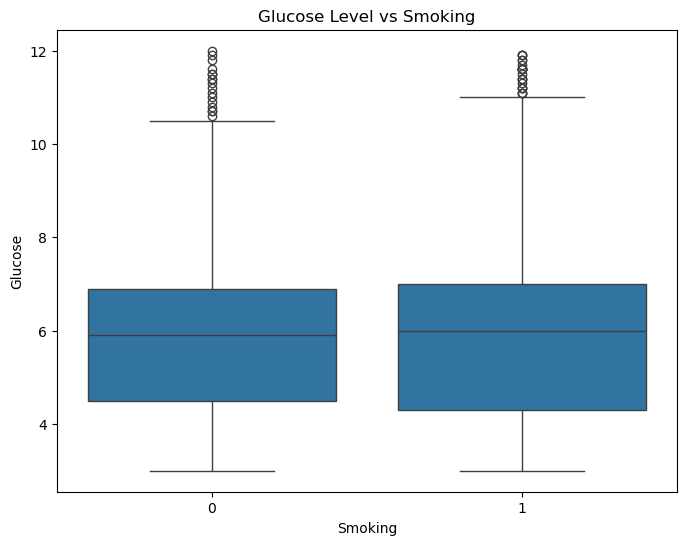

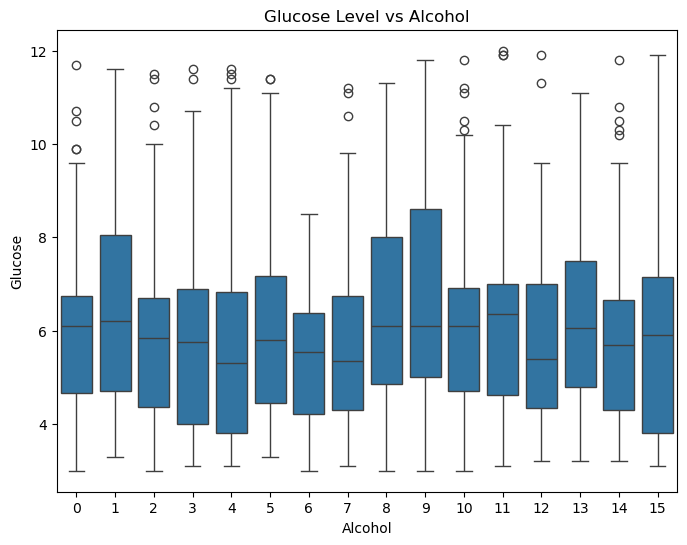

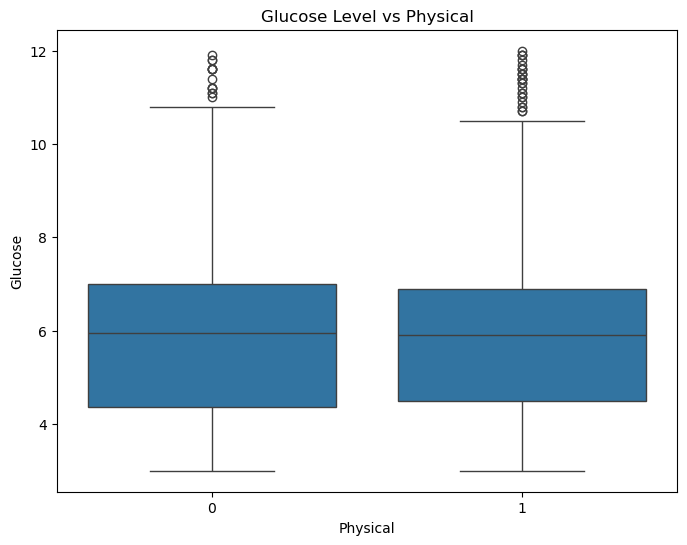

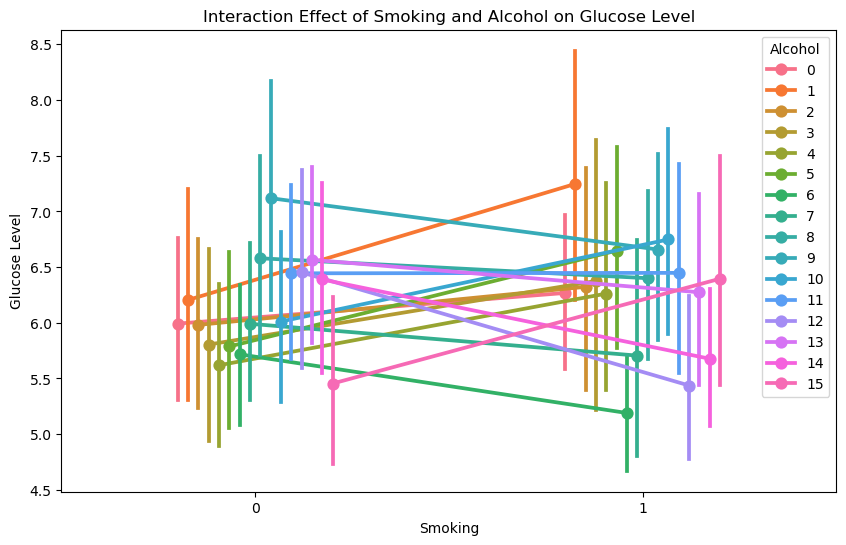

In [21]:
#------------------ Visualizations------------

# Box plots
categorical_vars = ['Smoking', 'Alcohol', 'Physical']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, y='Glucose', data=data)
    plt.title(f'Glucose Level vs {var}')
    plt.show()
    
# Interaction plot (if significant interaction in Two/Three-Way ANOVA)
# Interaction between Smoking and Alcohol
plt.figure(figsize=(10, 6))
sns.pointplot(x='Smoking', y='Glucose', hue='Alcohol', data=data, dodge=True)
plt.title('Interaction Effect of Smoking and Alcohol on Glucose Level')
plt.ylabel('Glucose Level')
plt.show()